# Spaceship Titanic Preprocessing

Predicting which passengers are transported to an alternate dimension. From the [spaceship titanic kaggle competition](https://www.kaggle.com/competitions/spaceship-titanic/overview).

This notebook handles the preprocessing of tabular data in preparation for implementing the GRANDE model (GRAdieNt-Based Decision Tree Ensembles). The goal is to prepare a clean, structured dataset ready for training with GRANDE in the accompanying model notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## Initial Data Exploration

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.count()

PassengerId     8693
HomePlanet      8492
CryoSleep       8476
Cabin           8494
Destination     8511
Age             8514
VIP             8490
RoomService     8512
FoodCourt       8510
ShoppingMall    8485
Spa             8510
VRDeck          8505
Name            8493
Transported     8693
dtype: int64

In [5]:
test_df.count()

PassengerId     4277
HomePlanet      4190
CryoSleep       4184
Cabin           4177
Destination     4185
Age             4186
VIP             4184
RoomService     4195
FoodCourt       4171
ShoppingMall    4179
Spa             4176
VRDeck          4197
Name            4183
dtype: int64

In [6]:
print(train_df.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [7]:
print(test_df.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


We can start of by looking at the distribution of the different features

In [8]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


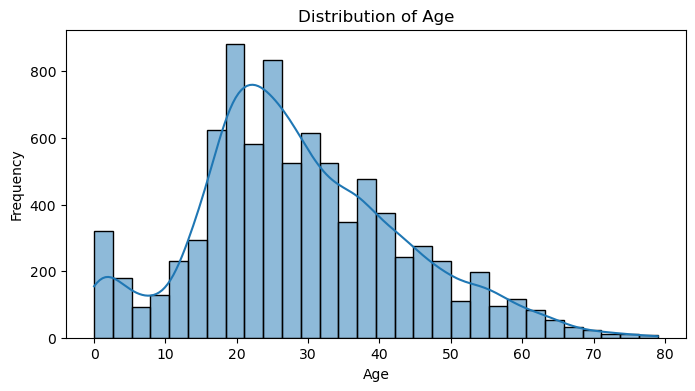

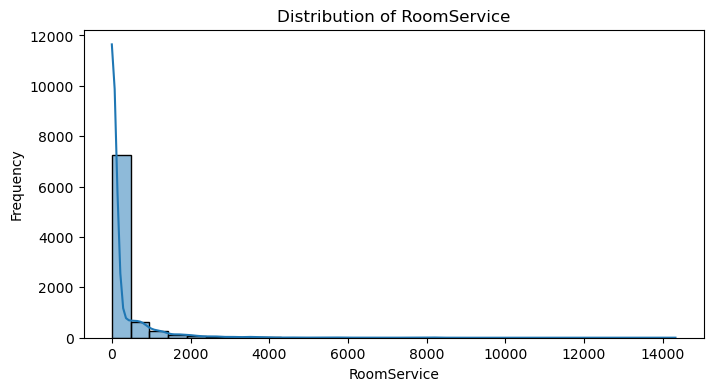

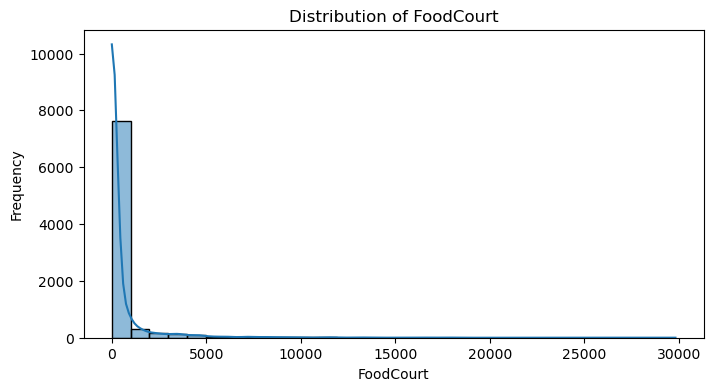

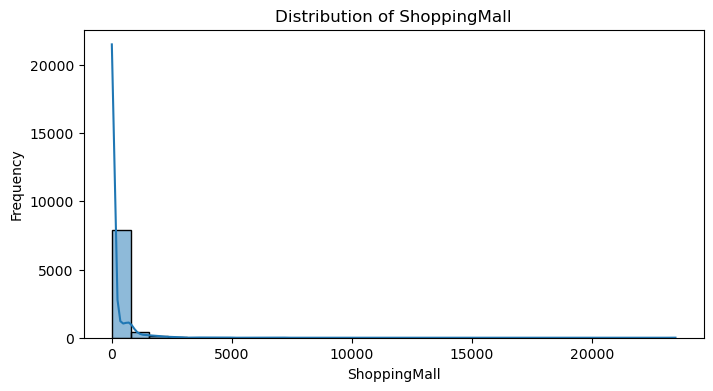

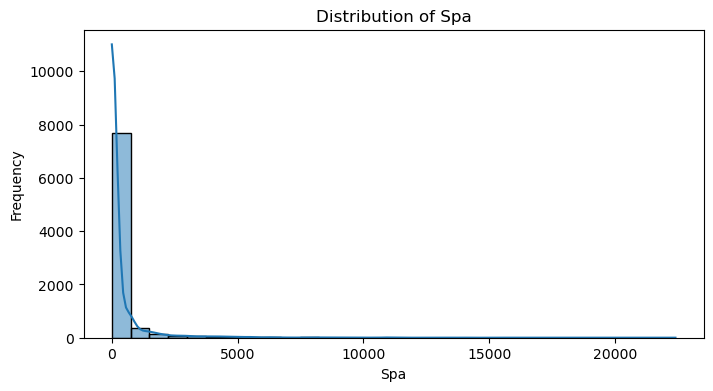

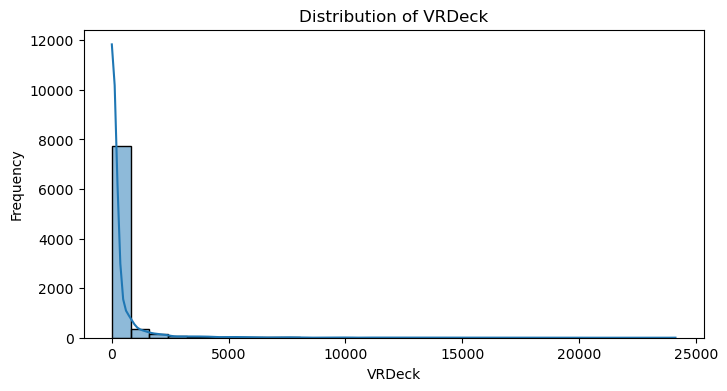

In [9]:
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Looking at the distribution of the categorical features

In [10]:
categorical_features = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

for feature in categorical_features:
    unique_count = train_df[feature].nunique()
    print(f"{feature}: {unique_count} unique values")

PassengerId: 8693 unique values
HomePlanet: 3 unique values
CryoSleep: 2 unique values
Cabin: 6560 unique values
Destination: 3 unique values
VIP: 2 unique values
Name: 8473 unique values


We can see that Cabin and Name have very many unique values compared to the size of the dataset. It is a good idea to look at the distribution of the other categorical features.

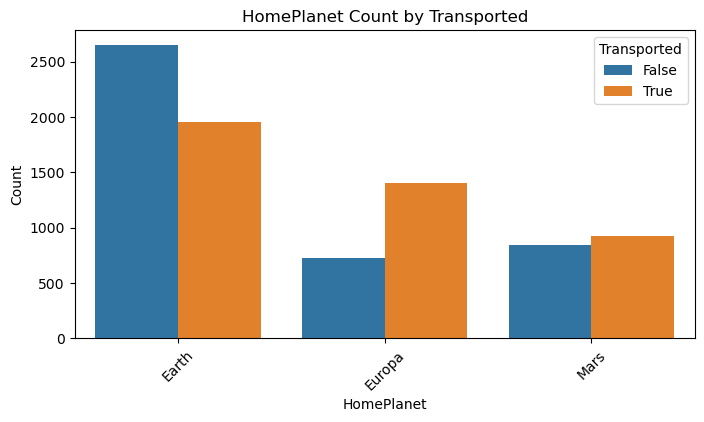

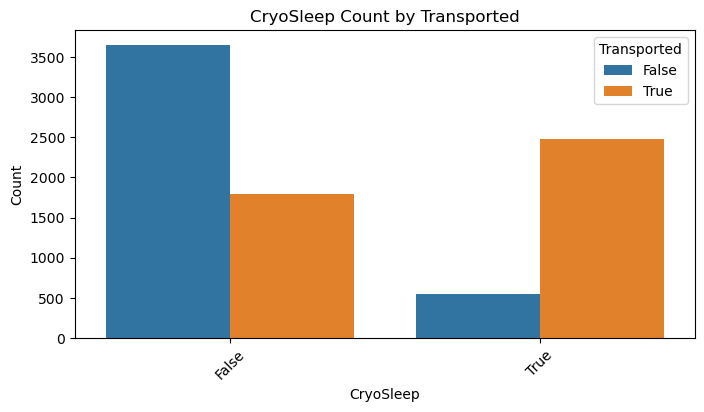

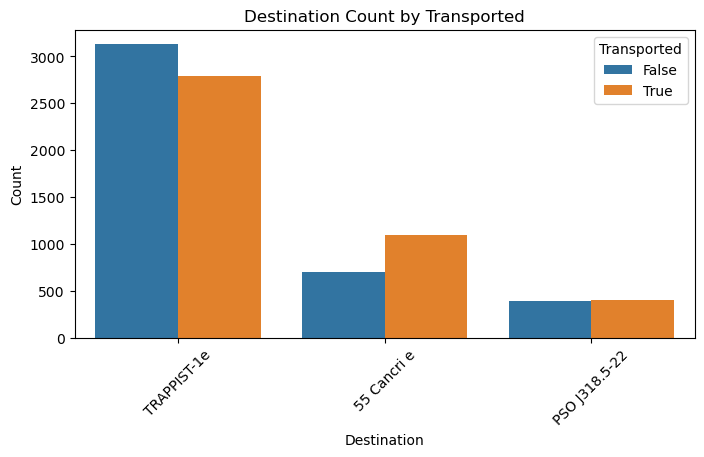

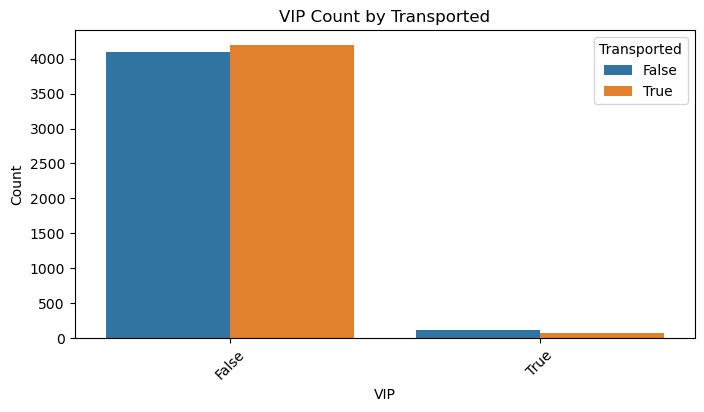

In [11]:
categorical_features_edited = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for feature in categorical_features_edited:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=feature, hue='Transported', order=train_df[feature].value_counts().index)
    plt.title(f'{feature} Count by Transported')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Because the 'Cabin' feature takes the form deck/num/side, where side can be either P for Port or S for Starboard, it is clear that this combination generates many unique values in the dataset. We can try to look at this feature after splitting it into 3 features 'Deck', 'CabinNum' and 'Side' instead of treating it as one feature.

In [12]:
# For train_df
temp_cabin_train = train_df['Cabin'].fillna('Unknown/0/Unknown')
train_df[['Deck', 'CabinNum', 'Side']] = temp_cabin_train.str.split('/', expand=True)

# For test_df
temp_cabin_test = test_df['Cabin'].fillna('Unknown/0/Unknown')
test_df[['Deck', 'CabinNum', 'Side']] = temp_cabin_test.str.split('/', expand=True)

# Convert CabinNum to numeric
train_df['CabinNum'] = pd.to_numeric(train_df['CabinNum'], errors='coerce')
test_df['CabinNum'] = pd.to_numeric(test_df['CabinNum'], errors='coerce')

# Drop the original Cabin column
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

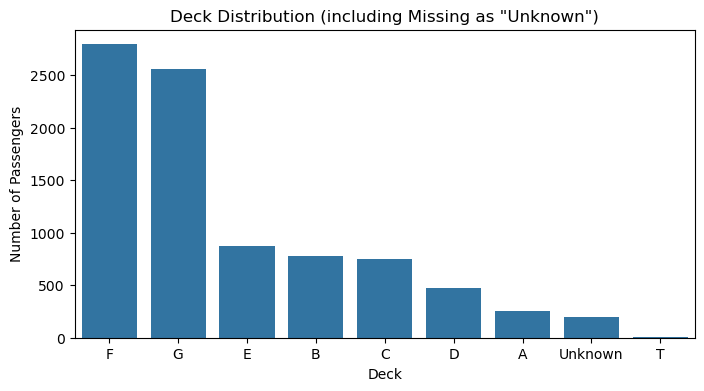

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train_df, x='Deck', order=train_df['Deck'].value_counts().index)
plt.title('Deck Distribution (including Missing as "Unknown")')
plt.xlabel('Deck')
plt.ylabel('Number of Passengers')
plt.show()

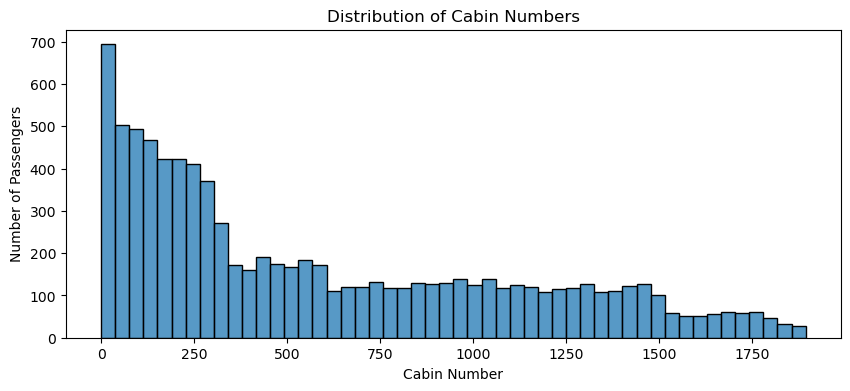

In [14]:
plt.figure(figsize=(10, 4))
sns.histplot(train_df['CabinNum'].dropna(), bins=50, kde=False)
plt.title('Distribution of Cabin Numbers')
plt.xlabel('Cabin Number')
plt.ylabel('Number of Passengers')
plt.show()

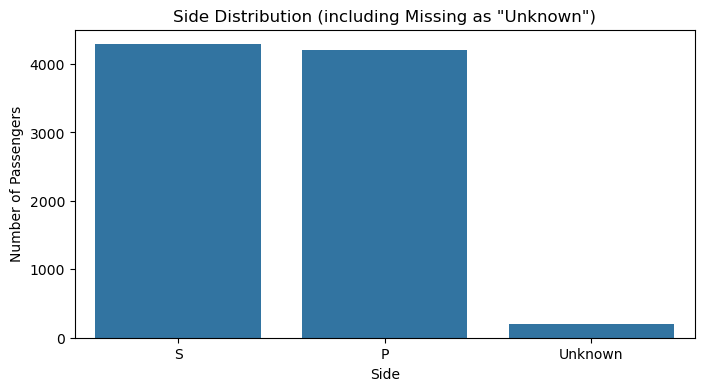

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train_df, x='Side', order=train_df['Side'].value_counts().index)
plt.title('Side Distribution (including Missing as "Unknown")')
plt.xlabel('Side')
plt.ylabel('Number of Passengers')
plt.show()

Based on the information above, we can safely remove the 'Name' features.

In [16]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

Looking at the missing values in the data. Note that the missing values in the splitted Cabin feature is 'Unknown' (shown as zero here).

In [17]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck              0
CabinNum          0
Side              0
dtype: int64

Based on the visualizations above, i will impute the missing values with the mode for the following features:
- HomePlanet
- CryoSleep
- Destination
- VIP
- Deck (from Cabin)
- CabinNum (from Cabin)
- Side (from Cabin)

Also based on the visualizations above and the description for the numerical data, i will impute missing values on all of them with the median value of the feature.

In [18]:
print(train_df.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Deck             object
CabinNum          int64
Side             object
dtype: object


Imputing categorical features (using the mode)

In [19]:
# For Cabin split
deck_mode = train_df['Deck'].mode()[0]
side_mode = train_df['Side'].mode()[0]

# Impute 'Unknown' with the mode (in both train and test)
train_df['Deck'] = train_df['Deck'].replace('Unknown', deck_mode)
test_df['Deck'] = test_df['Deck'].replace('Unknown', deck_mode)

train_df['Side'] = train_df['Side'].replace('Unknown', side_mode)
test_df['Side'] = test_df['Side'].replace('Unknown', side_mode)

cabin_num_median = train_df['CabinNum'].median()

train_df['CabinNum'] = train_df['CabinNum'].fillna(cabin_num_median)
test_df['CabinNum'] = test_df['CabinNum'].fillna(cabin_num_median)

# For the other categorical features we use the mode

cat_impute_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

cat_impute_values = {
    col: train_df[col].mode()[0] for col in cat_impute_cols
}

for col, mode_val in cat_impute_values.items():
    train_df[col] = train_df[col].fillna(mode_val)
    test_df[col] = test_df[col].fillna(mode_val)

# FutureWarning fix
train_df = train_df.infer_objects()
test_df = test_df.infer_objects()

/var/folders/jh/kw53zzdn5yd5gwmw471z_8z00000gn/T/ipykernel_21126/86597176.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[col] = train_df[col].fillna(mode_val)
/var/folders/jh/kw53zzdn5yd5gwmw471z_8z00000gn/T/ipykernel_21126/86597176.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[col] = test_df[col].fillna(mode_val)


Imputing the numerical features (using the median)

In [20]:
num_impute_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

num_impute_values = {
    col: train_df[col].median() for col in num_impute_cols
}

for col, median_val in num_impute_values.items():
    train_df[col] = train_df[col].fillna(median_val)
    test_df[col] = test_df[col].fillna(median_val)


In [21]:
train_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
CabinNum        0
Side            0
dtype: int64

In [22]:
test_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
CabinNum        0
Side            0
dtype: int64

One-hot encoding the categorical columns

In [23]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
# Use get_dummies to one-hot encode

train_enc, test_enc = (
    pd.get_dummies(train_df, columns=categorical_cols, drop_first=True),
    pd.get_dummies(test_df,  columns=categorical_cols, drop_first=True),
)
train_enc, test_enc = train_enc.align(
    test_enc, join='left', axis=1, fill_value=0
)

# Now test_enc has a Transported column filled with zeros—so drop it:
test_enc = test_enc.drop('Transported', axis=1)

In [25]:
os.makedirs('data', exist_ok=True)

# Save the processed DataFrames
train_enc.to_csv('data/train_processed.csv', index=False)
test_enc.to_csv('data/test_processed.csv', index=False)

In [27]:
print(test_enc.columns)

Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'CabinNum', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_True', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_True', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_S'],
      dtype='object')
